#####################
Importing modules needed
#####################

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np
import math
import pylab
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

from scipy.integrate import simps
from numpy import trapz
import pandas as pd

##################
Setting shift and location of data
##################

In [92]:
shift = 3.74
title = "membrane"
path = "~/Desktop/profiles/offset_comparison/data/" + title + ".csv"  #working on localhost

##################
Calculate the zeroth moment of the lateral pressure profile
##################

In [93]:
data_zeroth = pd.read_csv(path)

x_shift = data_zeroth["z"]
y = (data_zeroth["PL"] + data_zeroth["PT"])*10e4  # the 10e4 is for transition from bars to Pascals

x=[]
for coor in x_shift:
        x.append((coor - shift)*10e-10)           # the 10e4 is for transition from nanometers to meters



area_s = simps(y, x)
area_t = trapz(y, x)

print("The zeroth moment of lateral pressure profile calculated by simpson is: {}".format(area_s))

print("And by trapz: {}".format(area_t))

The zeroth moment of lateral pressure profile calculated by simpson is: 0.015893854637300316
And by trapz: 0.008682986012621468


##################
Calculate the first moment of the lateral pressure profile
##################

In [94]:
data_first = pd.read_csv(path)

x_first = x
y_first = (data_first["PL"] + data_first["PT"])*x_first*10e4   # the 10e4 is for transition from bars to Pascals


x_pos=[]
x_neg=[]
for num in x_first:
    if num <= 0:
        x_neg.append(num)
    else:
        x_pos.append(num)
        
y_pos = y_first[len(x_pos)-1:]
y_neg = y_first[:len(x_pos)-1]
#Calculate the negative part



area_s_neg = simps(y_neg, x_neg)
area_t_neg = trapz(y_neg, x_neg)
area_s_pos = simps(y_pos, x_pos)
area_t_pos = trapz(y_pos, x_pos)


print(" (-) First moment of the lateral pressure profile of system with {} sidechains (simpson): {}".format(title, area_s_neg))
print(" (-)by trapz is: {}".format(area_t_neg))

print(" (+) First moment of the lateral pressure profile of system with {} sidechains (simpson): {}".format(title, area_s_pos))
print(" (+)by trapz is: {}".format(area_t_pos))

 (-) First moment of the lateral pressure profile of system with membrane sidechains (simpson): -2.4110654509630148e-11
 (-)by trapz is: -1.7527794761797665e-11
 (+) First moment of the lateral pressure profile of system with membrane sidechains (simpson): 2.190346172127537e-11
 (+)by trapz is: 2.1894027429283134e-11


#####################
Setting of graph look
#####################

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


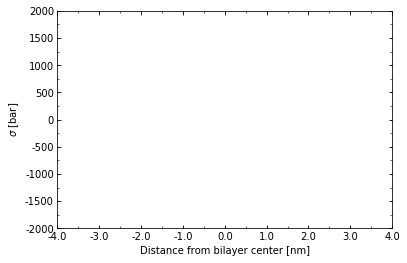

In [95]:

fig = plt.figure()
ax1 = fig.add_subplot(111)


majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%.1f')
minorLocator = MultipleLocator(0.5)
YmajorLocator = MultipleLocator(500)
YmajorFormatter = FormatStrFormatter('%d')
YminorLocator = MultipleLocator(250)


ax = plt.subplot(111)


# Hide the right and top spines
ax1.spines['right'].set_visible(True)
ax1.spines['top'].set_visible(True)

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.axes.tick_params(axis='both',which='both',direction='in')


pylab.xlim(-4.00,4.00)
pylab.ylim(-2000,2000)
data = pd.read_csv(path)

pylab.xlabel("Distance from bilayer center [nm]")
pylab.ylabel(r"$\sigma$ [bar]")


ax1.xaxis.set_major_locator(majorLocator)
ax1.xaxis.set_major_formatter(majorFormatter)

ax1.yaxis.set_major_locator(YmajorLocator)
ax1.yaxis.set_major_formatter(YmajorFormatter)

# for the minor ticks, use no labels; default NullFormatter
ax1.xaxis.set_minor_locator(minorLocator)
ax1.yaxis.set_minor_locator(YminorLocator)


##############
Plotting the graph
##############

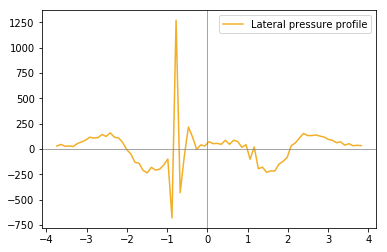

In [97]:
data = pd.read_csv(path)


pylab.plot(data["z"] - shift, data["PL"]+data["PT"], "#f2ae26", label="Lateral pressure")

plt.axvline(0,color="grey",linewidth=0.7)
plt.axhline(0,color="grey",linewidth=0.7)
pylab.legend(["Lateral pressure profile"],loc=1 )

pylab.savefig(title + "_pressure_profile.pdf",bbox_inches="tight")